In [16]:
# Importing libraries in Python

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns

In [17]:
#Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

##Loading the iris Dataset

In [18]:
iris = datasets.load_iris()

In [19]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

In [20]:
data['Species']=iris['target']


In [21]:
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

In [22]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


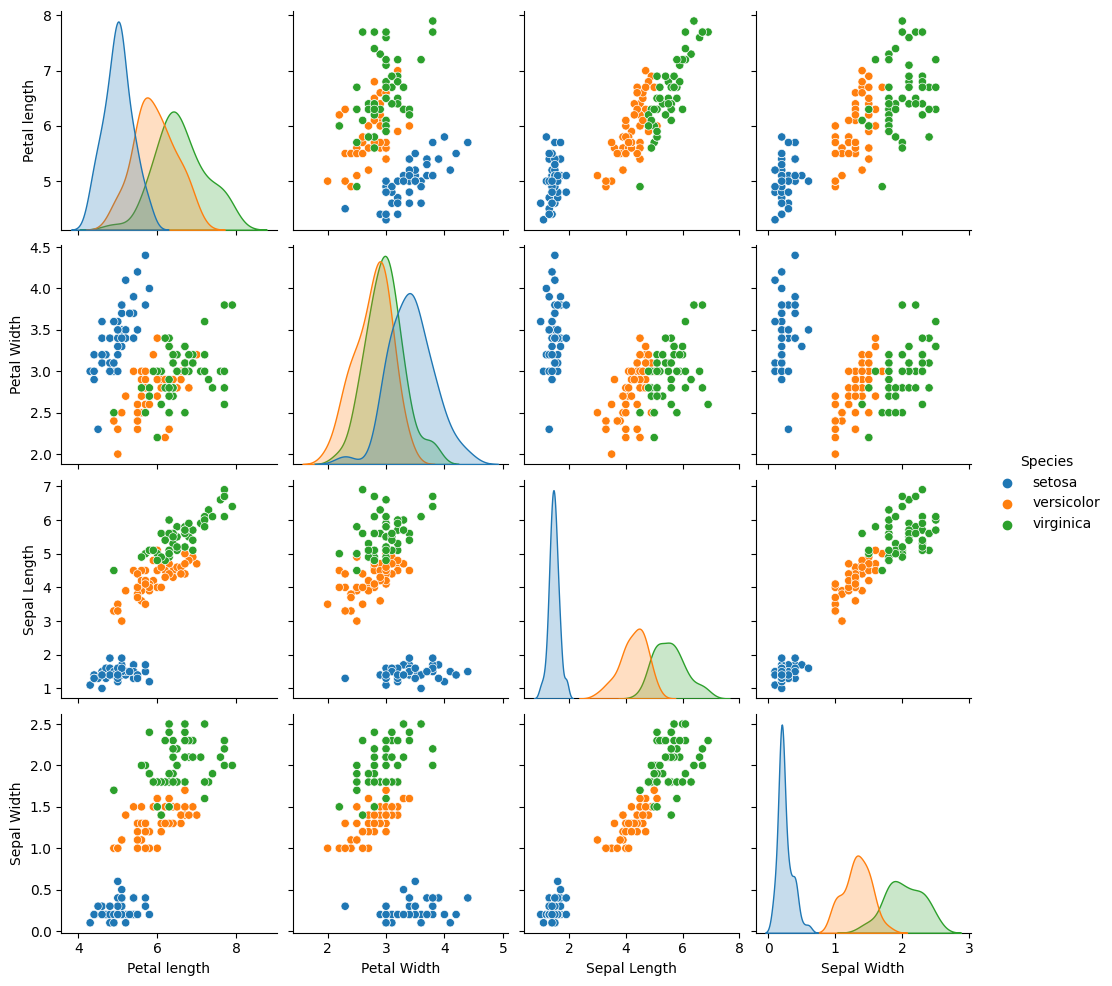

In [23]:
sns.pairplot(data, hue = 'Species')
plt.show()

##HeatMap

[]

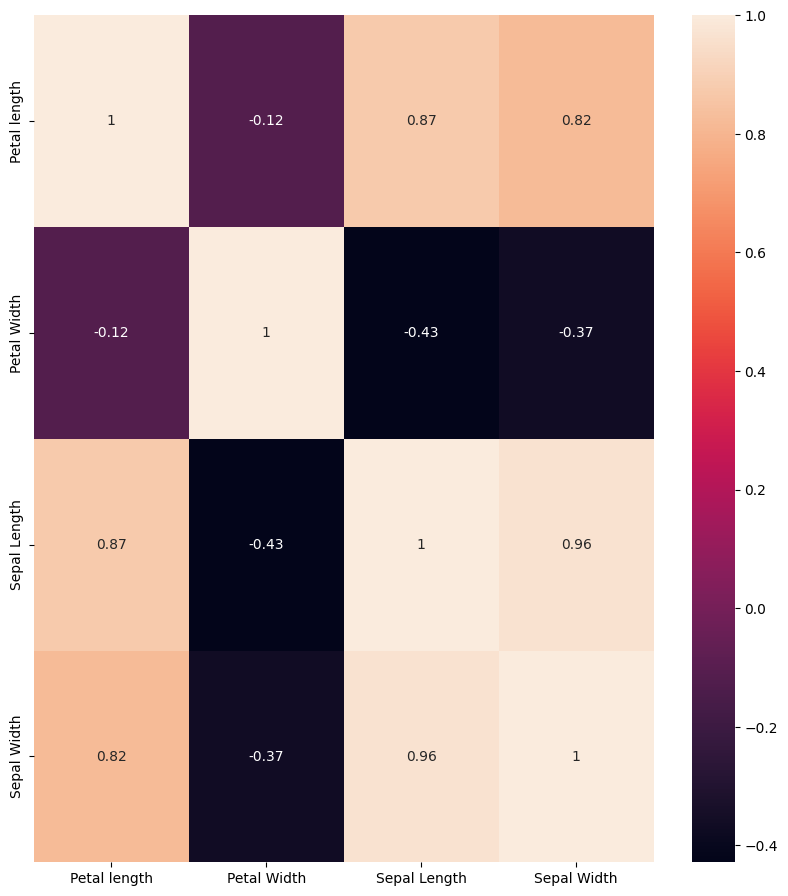

In [24]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

##BoxPlot

<Axes: xlabel='Species', ylabel='Petal Width'>

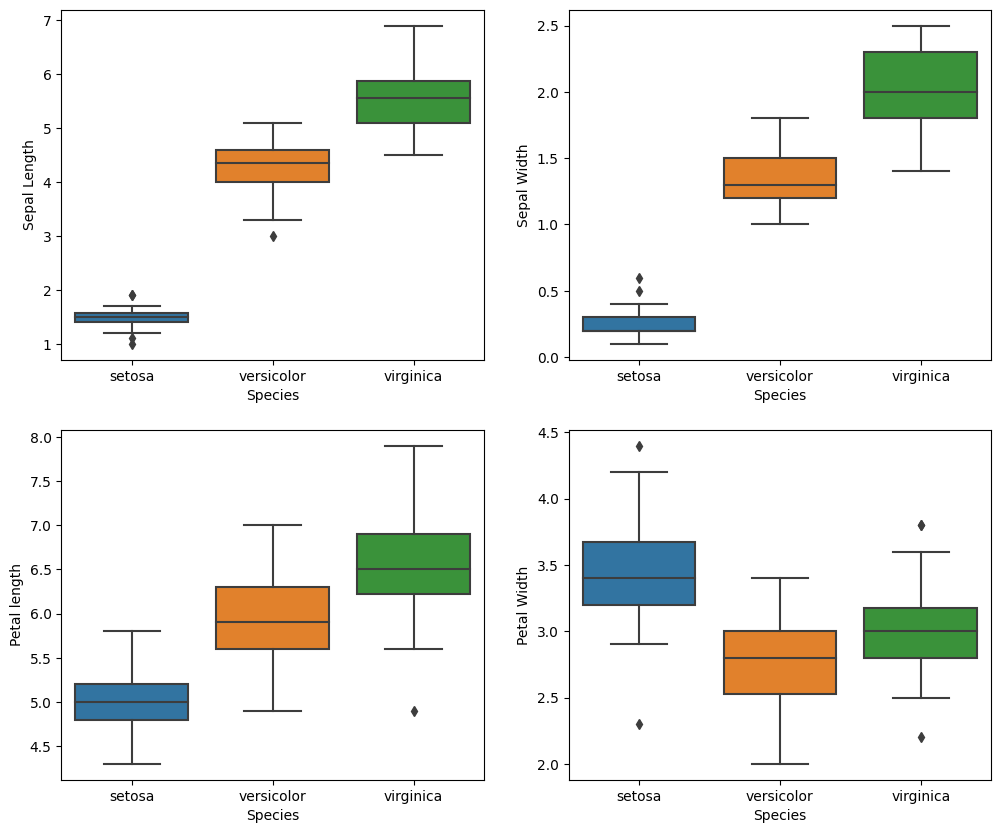

In [25]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width",data=data)

##Model Building

In [26]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(data,test_size=0.3)

In [27]:
train_X=train[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
train_y=train.Species

In [28]:
test_X=test[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
test_y=test.Species

##Implement Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=12)
model = DT.fit(train_X, train_y)

In [31]:
DT.predict(test_X)

array(['versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [32]:
DT.score(test_X, test_y)

0.9111111111111111

In [33]:
#prediction
y_pred = DT.predict(test_X)
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(test_y, y_pred))

Accuracy Score: 0.9111111111111111


##Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_pred)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(test_y,y_pred))
cm

Accuracy: 0.9111111111111111


array([[13,  0,  0],
       [ 0, 10,  3],
       [ 0,  1, 18]])

##Visualization of decision Tree

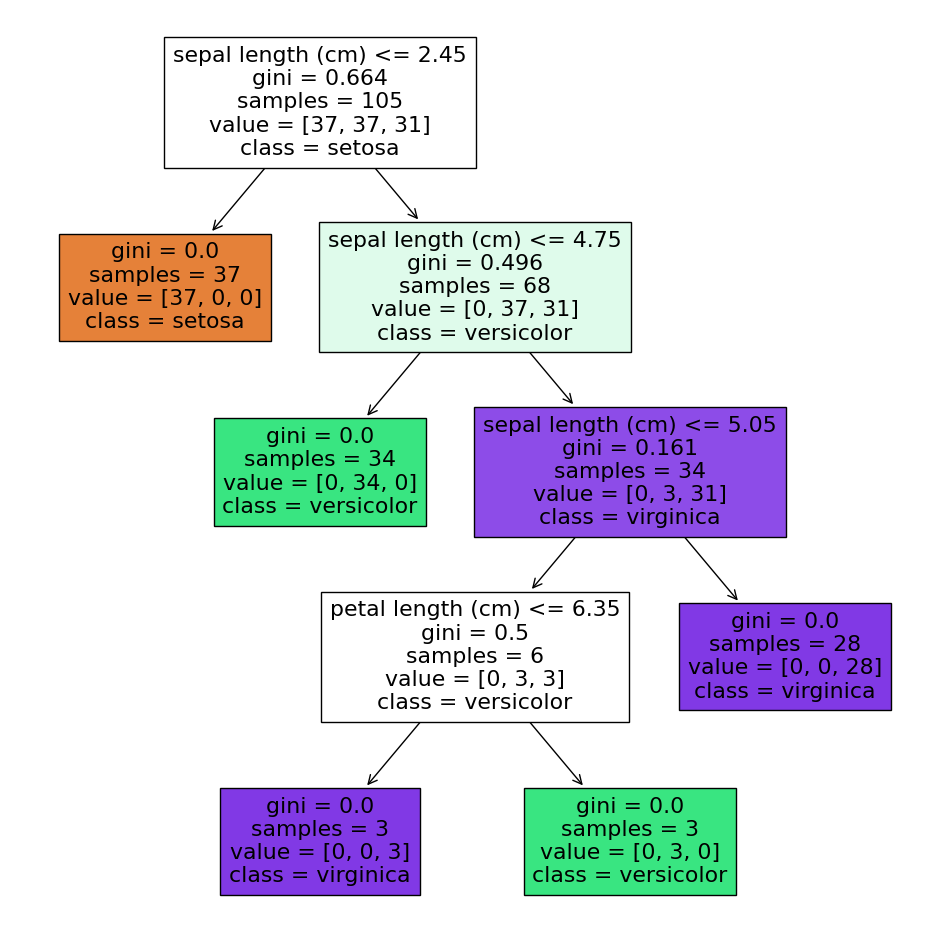

In [40]:
# Visualize the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(DT, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()